# Steel Plate Defect Prediction
<img src="https://www.researchgate.net/publication/354760527/figure/fig1/AS:11431281388040366@1745159899699/Surface-defects-of-steel-plate.tif" width=600>


This project is a Kaggle competition where the main goal is to develop a machine learning model that predicts potential manufacturing defects using feature data from steel plates. This is a **multi-label classification** problem.

The dataset consists of numerous columns containing various geometric and physical properties of the plates. In this project, the **target columns** we will try to predict with our model represent 7 different types of faults:

* `Pastry`
* `Z_Scratch`
* `K_Scatch`
* `Stains`
* `Dirtiness`
* `Bumps`
* `Other_Faults`

The model's performance will be evaluated by the average of the **ROC AUC** scores calculated for each fault type.

The dataset was taken from Kaggle:

[Steel Plate Defect Prediction](https://www.kaggle.com/competitions/playground-series-s4e3/overview)

## Data Read

In [52]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

## EDA - Exploratory Data Analysis

In [4]:
train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [11]:
train.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [10]:
train.shape

(19219, 35)

In [7]:
train.head().T

,0,1,2,3,4
id,0.0000,1.0000,2.000000e+00,3.000000e+00,4.0000
X_Minimum,584.0000,808.0000,3.900000e+01,7.810000e+02,1540.0000
X_Maximum,590.0000,816.0000,1.920000e+02,7.890000e+02,1560.0000
Y_Minimum,909972.0000,728350.0000,2.212076e+06,3.353146e+06,618457.0000
Y_Maximum,909977.0000,728372.0000,2.212144e+06,3.353173e+06,618502.0000
Pixels_Areas,16.0000,433.0000,1.138800e+04,2.100000e+02,521.0000
X_Perimeter,8.0000,20.0000,7.050000e+02,1.600000e+01,72.0000
Y_Perimeter,5.0000,54.0000,4.200000e+02,2.900000e+01,67.0000
Sum_of_Luminosity,2274.0000,44478.0000,1.311391e+06,3.202000e+03,48231.0000
Minimum_of_Luminosity,113.0000,70.0000,2.900000e+01,1.140000e+02,82.0000


In [12]:
train.isnull().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [13]:
train.duplicated().sum()

0

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [15]:
train.drop('id', axis=1).describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,128.647380,1459.350747,0.402674,0.596337,76.213122,0.352939,0.409309,0.574520,0.030609,0.614749,0.831652,0.591899,2.473475,1.312667,1.389737,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,14.196976,145.568687,0.490449,0.490644,53.931960,0.318976,0.124143,0.259436,0.047302,0.222391,0.220966,0.482050,0.760575,0.467848,0.405549,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,39.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.105000,0.000000,0.778200,0.301000,0.000000,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.058600,0.317500,0.375750,0.006600,0.451600,0.655200,0.000000,1.949400,1.000000,1.079200,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,69.000000,0.238500,0.413500,0.545400,0.009500,0.636400,0.964300,1.000000,2.227900,1.146100,1.322200,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,135.000000,1652.000000,1.000000,1.000000,80.000000,0.656100,0.494600,0.818200,0.019100,0.785700,1.000000,1.000000,2.814900,1.431400,1.707600,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.927500,1.000000,0.665100,1.000000,1.000000,1.000000,4.554300,2.997300,4.033300,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
target=['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [18]:
fault_counts = train[target].sum().sort_values(ascending=False)

In [19]:
print(fault_counts)

Other_Faults    6558
Bumps           4763
K_Scatch        3432
Pastry          1466
Z_Scratch       1150
Stains           568
Dirtiness        485
dtype: int64


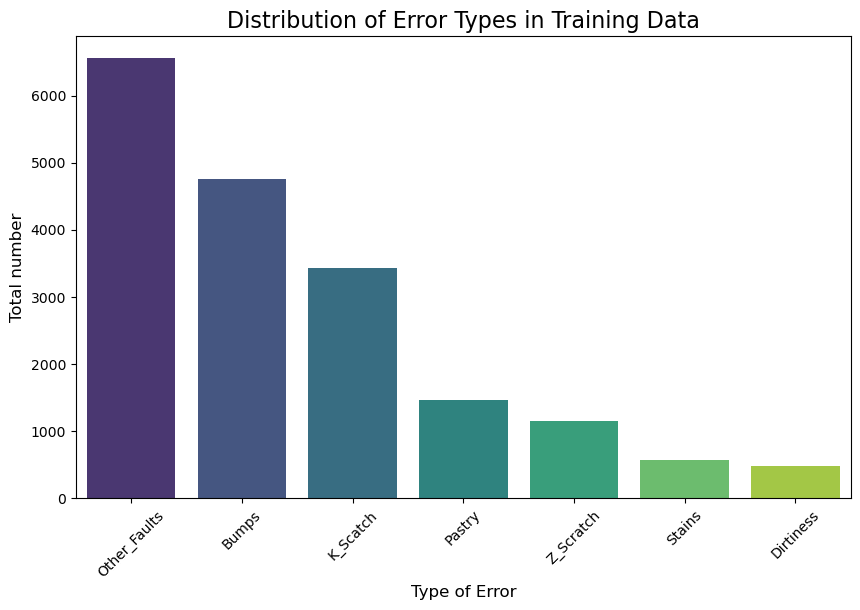

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=fault_counts.index, y=fault_counts.values, palette='viridis')
plt.title('Distribution of Error Types in Training Data', fontsize=16)
plt.xlabel('Type of Error', fontsize=12)
plt.ylabel('Total number', fontsize=12)
plt.xticks(rotation=45)
plt.show()

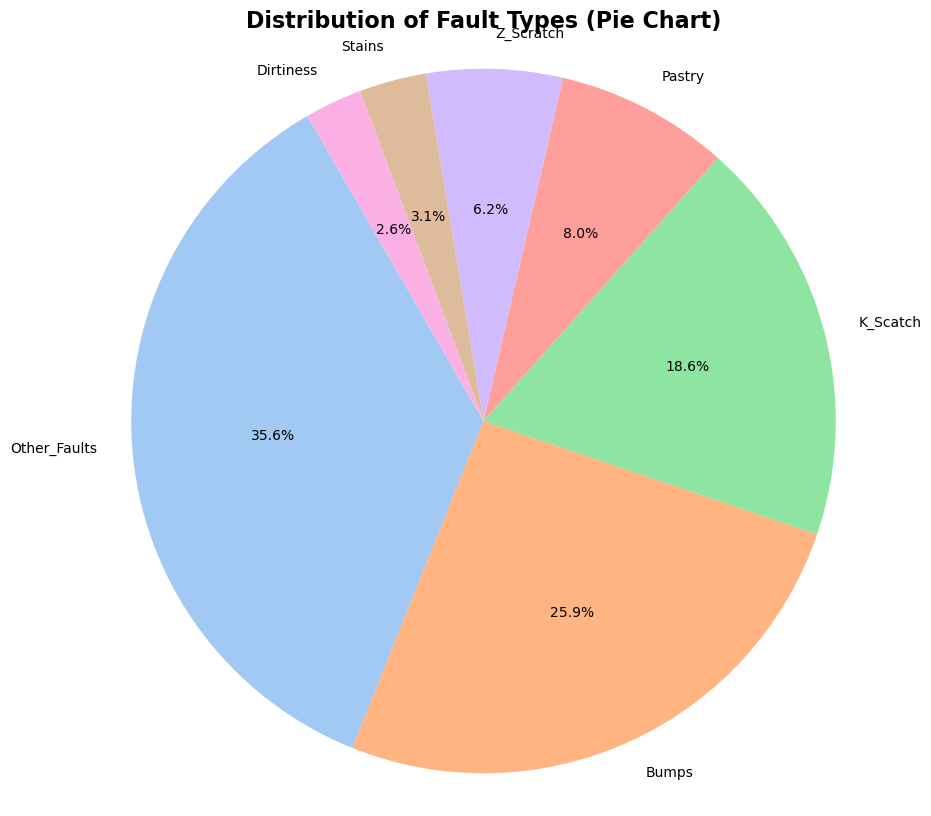

In [27]:
colors = sns.color_palette('pastel')

plt.figure(figsize=(10, 10))
plt.pie(fault_counts, 
        labels=fault_counts.index, 
        colors=colors,
        autopct='%1.1f%%',   
        startangle=120)      

plt.title('Distribution of Fault Types (Pie Chart)', fontsize=16, fontweight='bold')
plt.axis('equal') 

plt.show()

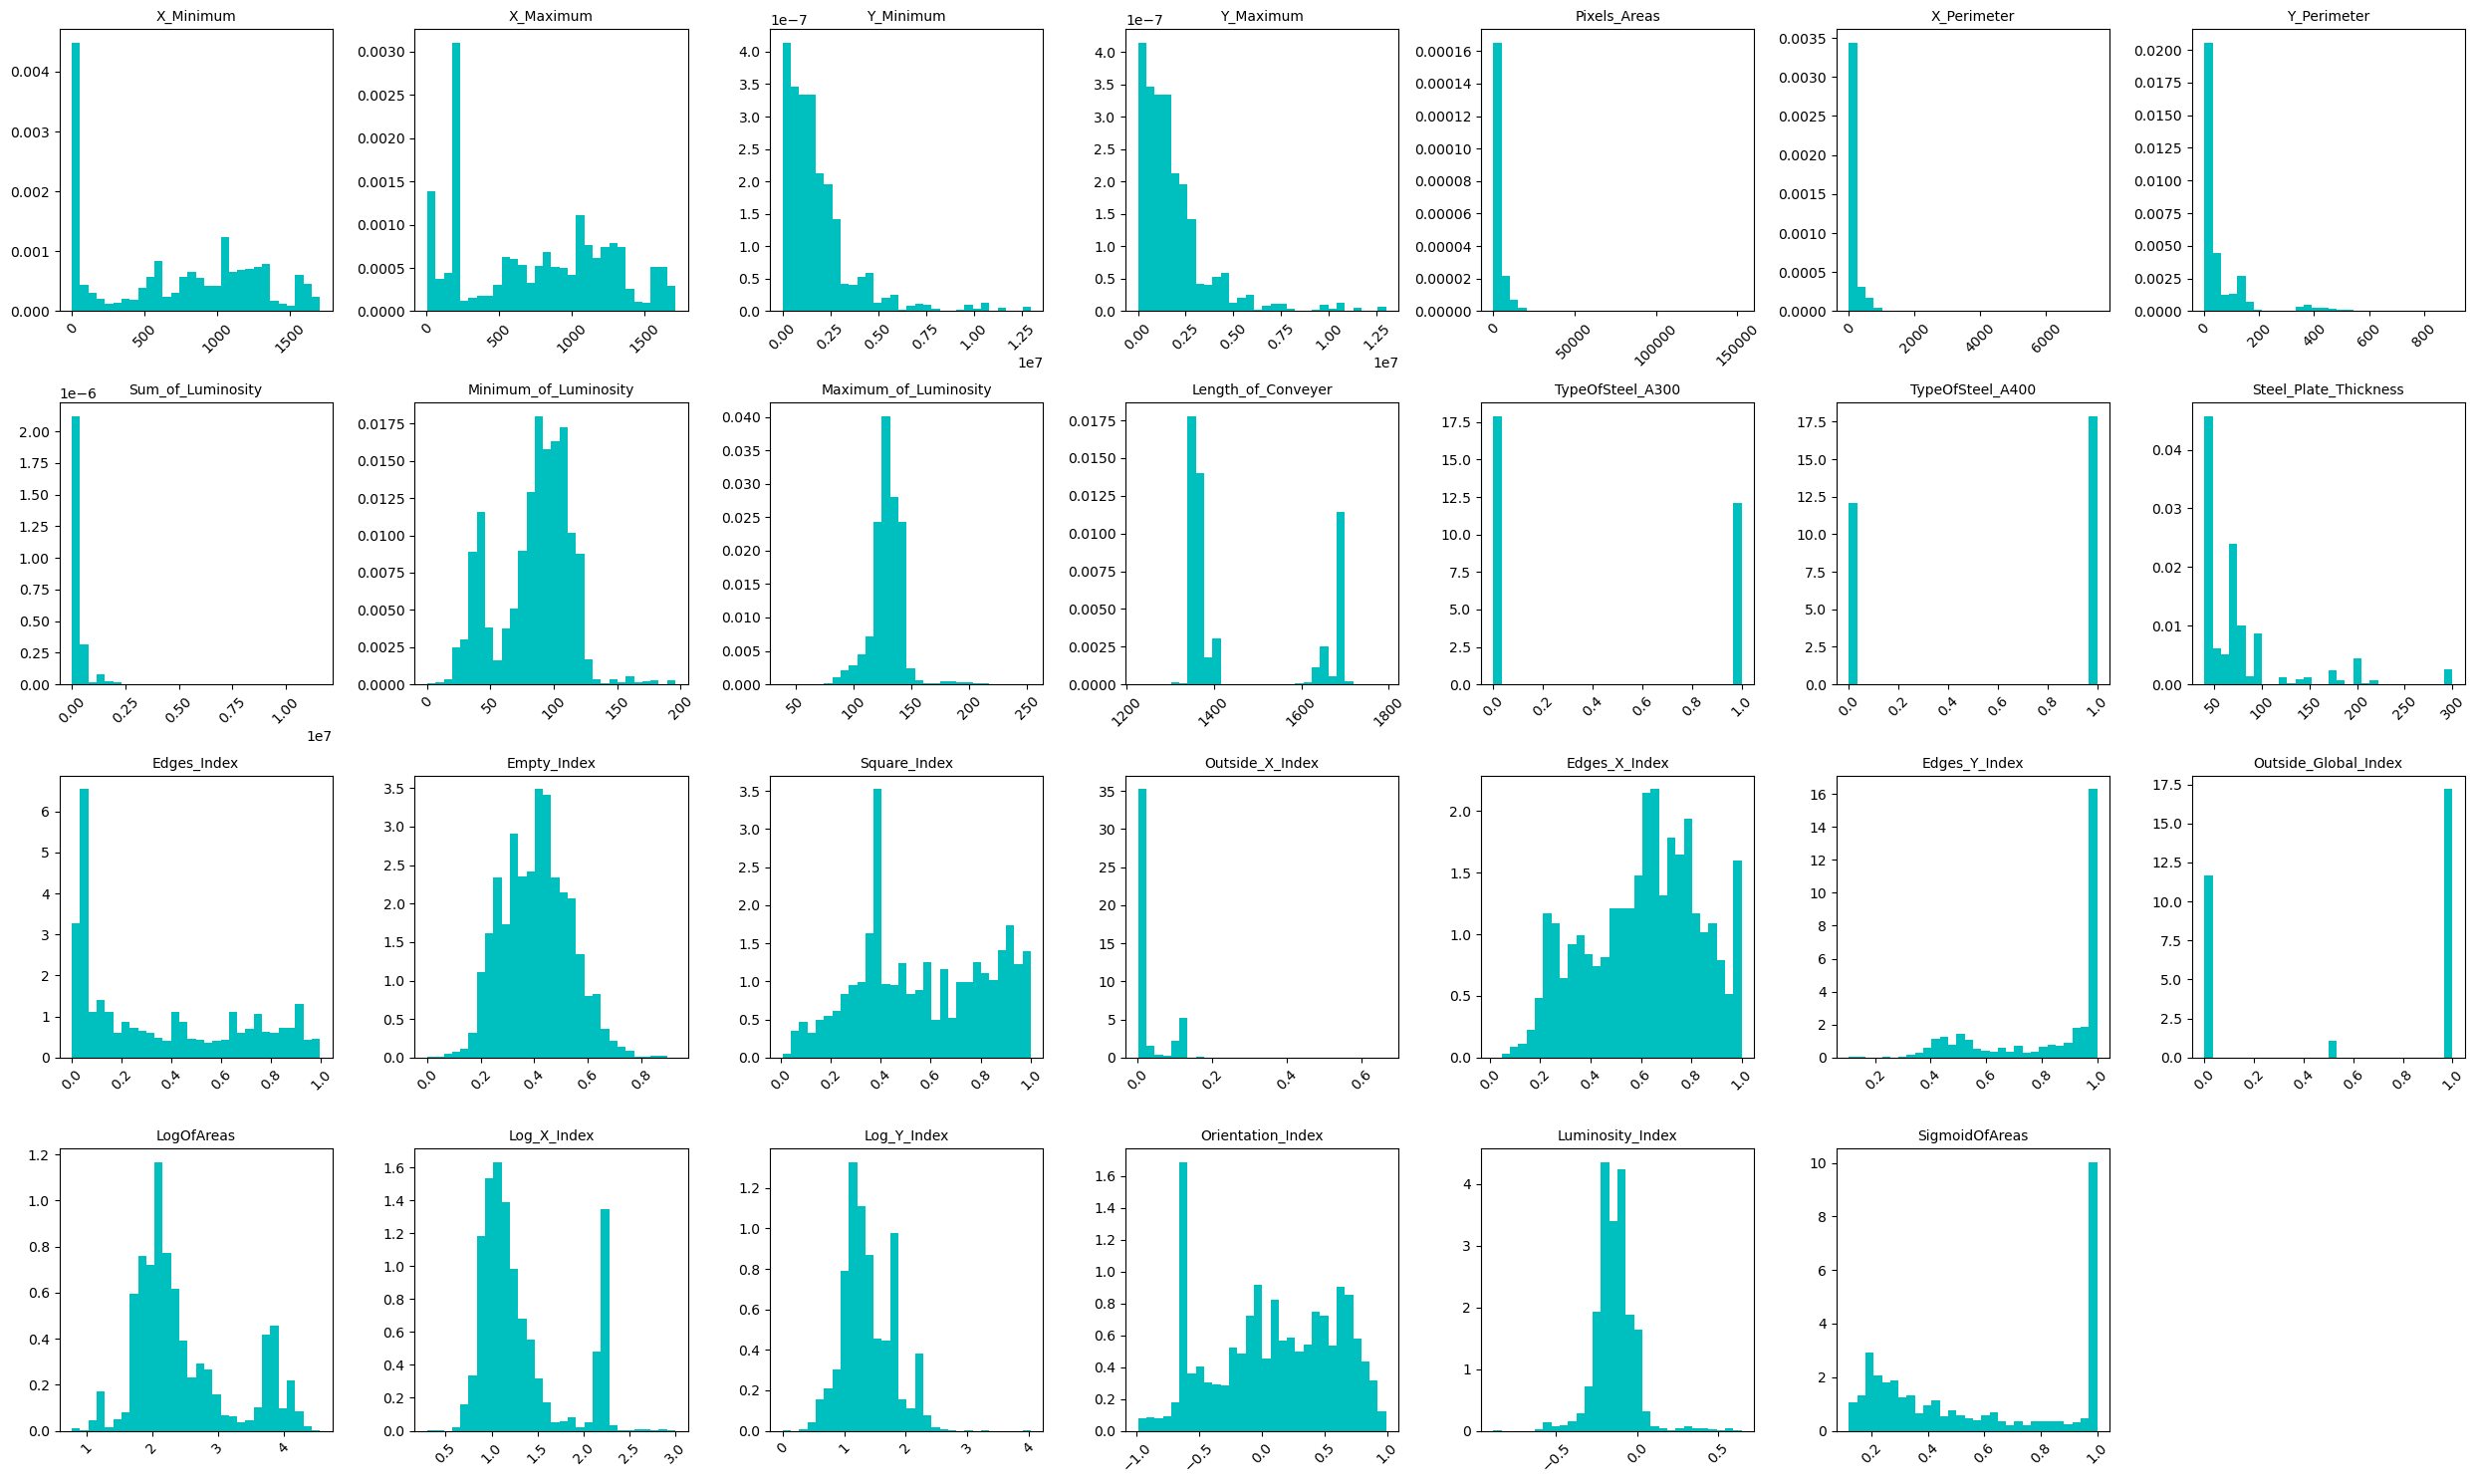

In [28]:
features = [col for col in train.columns if col not in ['id'] + target]

plt.figure(figsize=(25, 15))

for index, col in enumerate(features, start=1):
    plt.subplot(4, 7, index)
    plt.hist(train[col], bins=30, density=True, color='c')
    plt.title(col, fontsize=10)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Axes: >

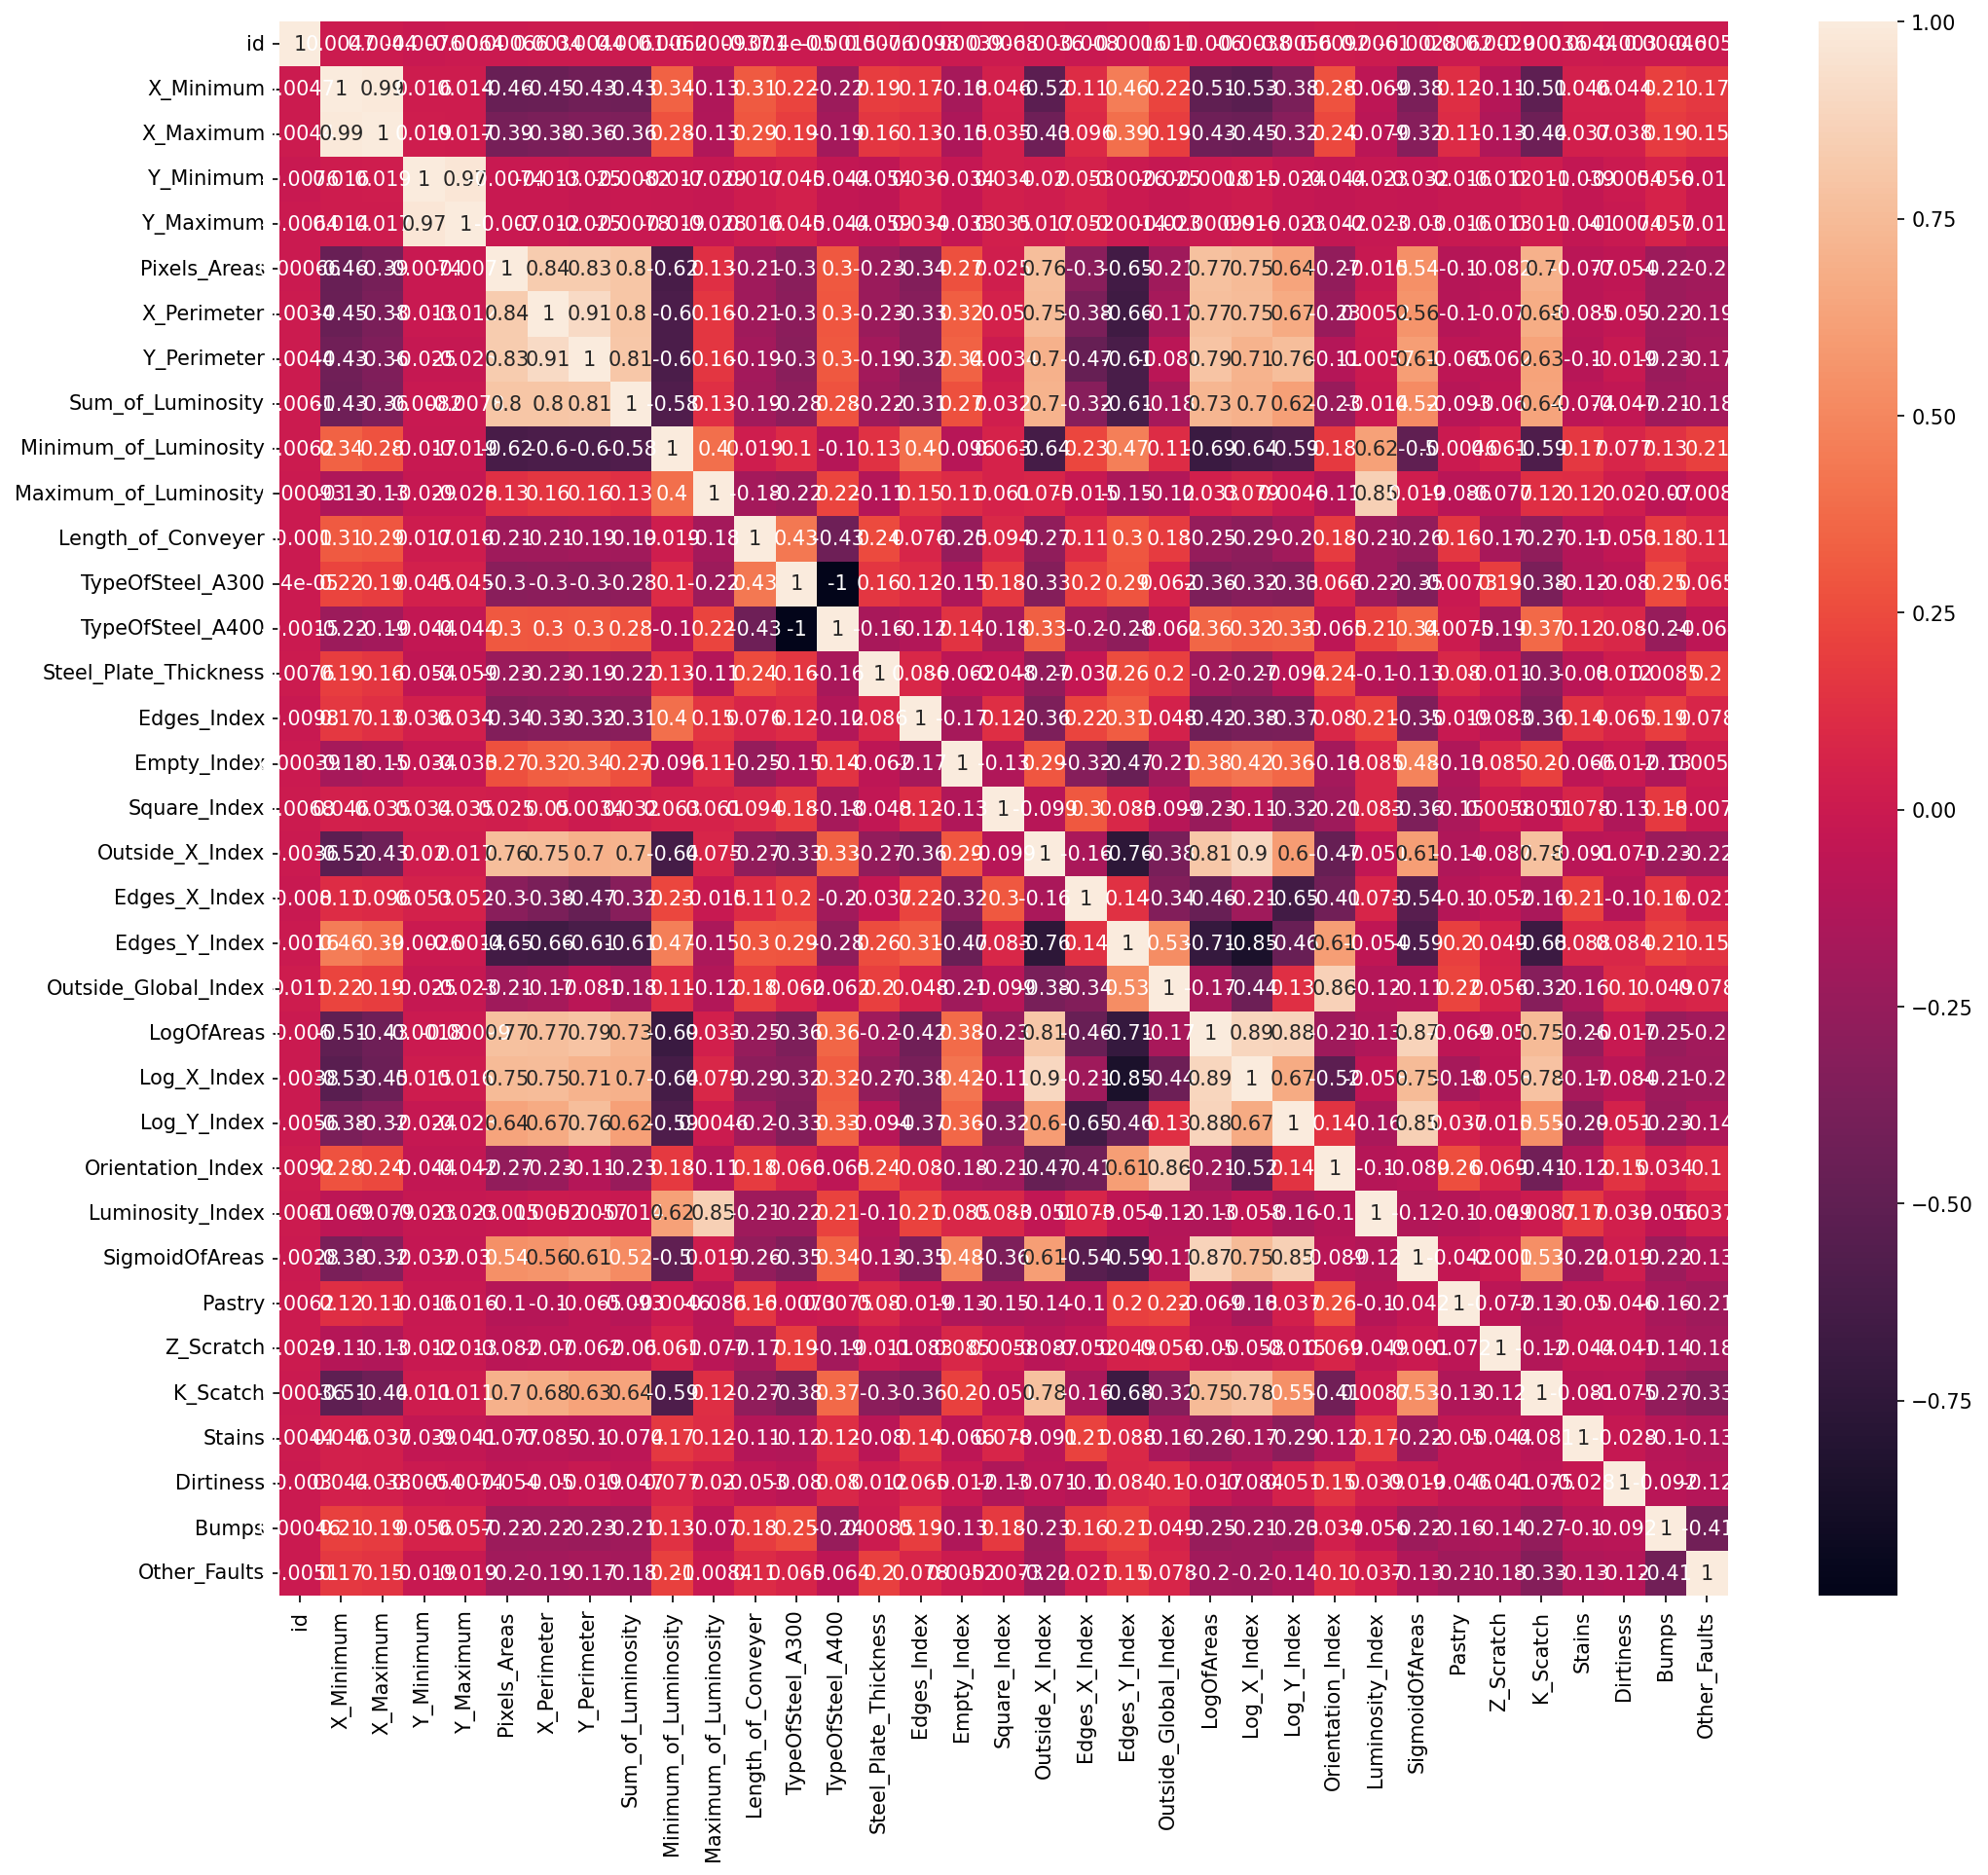

In [30]:
plt.figure(figsize=(16,14), dpi=150)
sns.heatmap(train.select_dtypes(include='number').corr(numeric_only=True), annot=True)

## Data Preprocessing

In [31]:
target = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

def combine_target_variables(row):
    defect = None
    for col in target:
        if row[col] == 1:
            defect = col
            break
    if defect:
        return defect
    else:
        return 'No Defect'

In [32]:
train['Target'] = train.apply(combine_target_variables, axis=1)

In [33]:
train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,Target
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0,Stains
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1,Other_Faults
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0,K_Scatch
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0,K_Scatch
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1,Other_Faults


In [34]:
train.drop(columns=['Target'], inplace=True)

In [35]:
target_col = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

## Modelling

In [38]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [36]:
x = train.drop(target_col, axis=1)
y = train[target_col]

In [39]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
xgboost_model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    #max_depth=12,  
    learning_rate=0.005,
    subsample=0.85,
    colsample_bytree=0.85,
    alpha=0.001,
    reg_lambda=0.001,  
    gamma=0.1,
    min_child_weight=5,
    n_estimators=1500,
    random_state=42
)

In [42]:
xgboost_model.fit(x_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.85
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


In [45]:
tahmin = xgboost_model.predict_proba(x_test)

In [49]:
auc_scores = []

In [46]:
auc_score = roc_auc_score(y_test, tahmin)

In [50]:
auc_scores.append(auc_score)

In [53]:
mean_auc_score = np.mean(auc_scores)

In [54]:
print("Mean AUC Score (XGBoost):", mean_auc_score)

Mean AUC Score (XGBoost): 0.8873188694146253


## Conclusion

In this project, a **multi-label classification** problem was addressed, aiming to predict 7 different types of steel plate defects.

The **XGBoost** model trained for this task achieved a high **Mean AUC Score of 0.8873** on the test data. This result demonstrates that the model is highly successful at distinguishing between different fault types and offers an effective solution for predicting steel plate defects.